# **Evaluation of a model and its application for prediction**
*Dataset source: https://www.inegi.org.mx/app/indicadores/?t=95&ag=00#D95#D6207061409*
<br>*Author: Myroslava Sánchez Andrade A01730712*
<br>*Creation date: 14/10/2022*
<br>*Last updated: 21/10/2022*

---
## **Overview**

The purpose of this repository is to calibrate an ARIMA-SARIMA model for the series of the GLOBAL INDEX OF ECONOMIC ACTIVITY of Mexico. It was carried out the process of data management and calibration of the model to obtain a forecast of the Mexican economy until the end of the current sexenial administration (SEP 2024).

--- 
## **Configuration**

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm


In [2]:
# Importing the dataset
h_index_economic_activity_mx = pd.read_csv('data/Indicadores20221007105052.csv')
h_index_economic_activity_mx

,Indicador,Nombre Indicador,Clave área geográfica,Entidad,Municipio,Periodo,Valor,Excepción,Unidad de medida,Frecuencia,Information Status,Referencias
0,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/07,111.274552,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
1,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/06,112.797501,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
2,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/05,114.442424,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
3,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/04,109.529866,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
4,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,2022/03,111.940152,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
...,...,...,...,...,...,...,...,...,...,...,...,...
350,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/05,63.612900,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
351,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/04,61.865984,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
352,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/03,63.943249,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1
353,6207061409,IGAE. Índice de volumen físico base 2013=100. ...,700,Estados Unidos Mexicanos,Estados Unidos Mexicanos,1993/02,61.022521,NaN,Índice de volumen físico base 2013=100,Mensual,NaN,/a /f1 /r1


In [3]:
# Keeping the realiable variables
h_index_economic_activity_mx = h_index_economic_activity_mx[['Periodo', 'Valor']]
h_index_economic_activity_mx = h_index_economic_activity_mx.loc[::-1].reset_index(drop=True)
h_index_economic_activity_mx

,Periodo,Valor
0,1993/01,60.407691
1,1993/02,61.022521
2,1993/03,63.943249
3,1993/04,61.865984
4,1993/05,63.612900
...,...,...
350,2022/03,111.940152
351,2022/04,109.529866
352,2022/05,114.442424
353,2022/06,112.797501


---
## **Stationarity analysis**

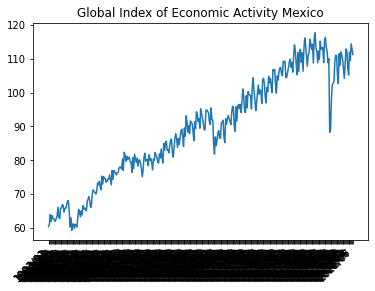

In [4]:
# Plotting the index over time
plt.clf()
plt.title("Global Index of Economic Activity Mexico")
plt.plot(h_index_economic_activity_mx.Periodo, h_index_economic_activity_mx.Valor)
plt.xticks(rotation = 45, ha = "right")
plt.show()

As we can observe in the above graphic, the index does not behave as a stationary serie, we can actually see that there is an increasing tendency of the index over time. By simply observing, we can observe that there are different average values in different periods of time. Since the first impression of the data analysis is that it does not behave as a stationary serie; in the next cells this first impression will be proved by checking the characteristics of stationary series.

***The average of the series is constant over time***

In [5]:
# Calculating the mean of every year
h_index_economic_activity_mx.groupby(h_index_economic_activity_mx.Periodo.str[0:4]).mean()

,Valor
Periodo,
1993,62.763073
1994,65.820599
1995,61.684299
1996,65.898989
1997,70.352236
1998,74.003165
1999,76.016915
2000,79.896427
2001,79.489557


As we can see, the mean varies over time (yearly).
Since it was demonstrated that the index does not behave as a stationary serie, the corresponding transformations will be made (difference of the log) to make it stationary.

---
## **Testing for stationarity**

In [6]:
# Calculating the monthly growth (in cc) of the index
h_index_economic_activity_mx_stationary = h_index_economic_activity_mx
h_index_economic_activity_mx_stationary['Ln Valor'] = np.log(h_index_economic_activity_mx['Valor'])
h_index_economic_activity_mx_stationary['CC Valor'] = h_index_economic_activity_mx['Ln Valor'] - h_index_economic_activity_mx['Ln Valor'].shift(12)
h_index_economic_activity_mx_stationary_no_nan = h_index_economic_activity_mx_stationary[~h_index_economic_activity_mx_stationary.isin([np.nan, np.inf, -np.inf]).any(1)].reset_index().drop(['index'], axis=1)
h_index_economic_activity_mx_stationary

,Periodo,Valor,Ln Valor,CC Valor
0,1993/01,60.407691,4.101116,NaN
1,1993/02,61.022521,4.111243,NaN
2,1993/03,63.943249,4.157996,NaN
3,1993/04,61.865984,4.124970,NaN
4,1993/05,63.612900,4.152816,NaN
...,...,...,...,...
350,2022/03,111.940152,4.717964,0.003661
351,2022/04,109.529866,4.696197,0.013414
352,2022/05,114.442424,4.740072,0.021001
353,2022/06,112.797501,4.725594,0.014522


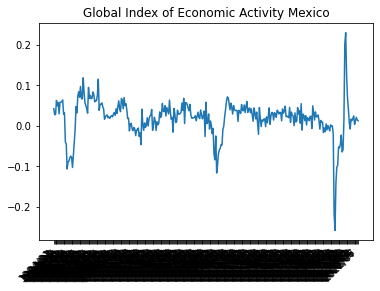

In [7]:
# Plotting the index (cc) over time
plt.clf()
plt.title("Global Index of Economic Activity Mexico")
plt.plot(h_index_economic_activity_mx_stationary_no_nan.Periodo, h_index_economic_activity_mx_stationary_no_nan['CC Valor'])
plt.xticks(rotation = 45, ha = "right")
plt.show()

Even though it looks like a stationary serie, we will test it running the Dicky-Fuller test.

In [8]:
# Performing augmented Dickey-Fuller test
adfuller(h_index_economic_activity_mx_stationary_no_nan['CC Valor'])

(-3.7672916222942328,
 0.003260263559812781,
 17,
 325,
 {'1%': -3.450632157720528,
  '5%': -2.870474482366864,
  '10%': -2.5715301325443787},
 -1446.8289417719393)

The first number represents the **t-value**, we can observe that it is greater than 2 (absolute value). The t-value is the mean minus the null hypothesis divided by the standard error, in this case the null hypothesis is the hypothesis where the serie is actually non stationary. The result of the t-value tells us how many standard deviations is our hypothesis away from the null hypothesis; lets remember that for a normal distribution, 2 standard deviations represent a 95% probability under the curve, thus, for a hypothesis to be approved, the t-value must be at least 2 (-2 for a negative relation). The **p value** is the probability of the null hypothesis to be correct. as we can see, the p-value for these variables is basically 0, which means that the probability of the serie to be non stationary is basically 0.

---
## **ACF and PACF plots**

c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


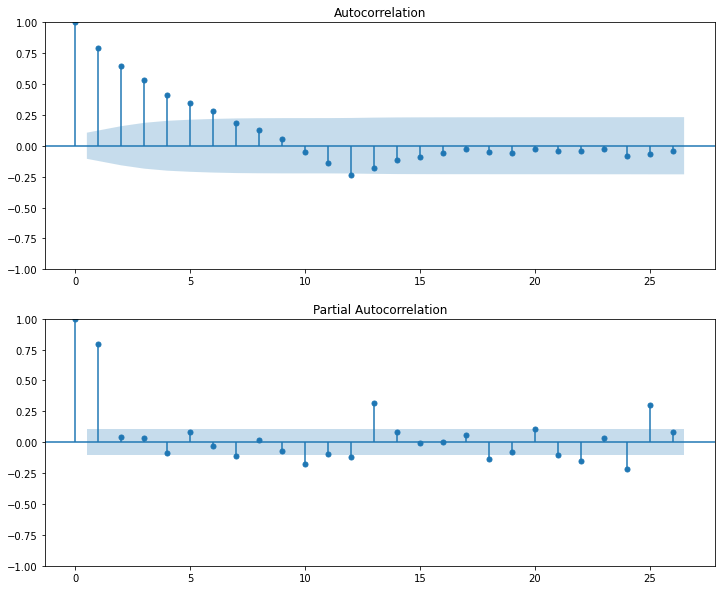

In [9]:
# Ploting the autocorrelations
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(h_index_economic_activity_mx_stationary_no_nan['CC Valor'], ax=ax1)  
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(h_index_economic_activity_mx_stationary_no_nan['CC Valor'], ax=ax2)

---
## **ACF and PACF interpretation**

The vertical lines are the magnitude of the autocorrelation between the current value and the lag. And the blue area are the 95% confidence interval for these autocorrelations, so the lines that cross the blue area mean that the autocorrelations are significantly different than zero.

For the modelling, it will be used de Seasonality ARIMA since this model relies on seasonal lags and differences to fit the seasonal pattern. To fit this model we first determine `D (# of seasonal differences)` and `d ( # of nonseasonal differences)`; since the seasonal pattern of the original data is strong and stable a seasonal difference must be used. As we proved in the Dicky-Fuller test, applying the first seasonal difference is enough to make the serie stationary, therefore: $D = 1$ and $d = 0$.

The AR(p) model (Autoregressive Model) assumes that there is some kind of autocorrelation in time series. This model has a **long term memory** since the values of the series tomorrow will depend on the value of today, thus the value of today will have have an impact int all the future series. To determine the number of `(p)` we can observe the **PACF** plot which describes the autocorrelations of the index; after observing it we can determine that $p = 1$.
The MA(q) (Moving-Average Model) has a **short term memory** and assumes that the values of today is directly affected by past random shocks. To determine the number of `(q)` we can observe in both the **ACF** plot which dies out gradually and the **PACF** plot which cuts off sharply, thus we can determine that $q = 0$.

In the **PACF** plot we can also observe that there is a seasonal pattern (every 12 lags we can observe a signinficant correlation), thus we can determine that $Q = 1$.

`SARIMA (p = 1, d = 0, q = 0)(P = 0, D = 1, Q = 1, s = 12)`

---
## **SARIMA Model**

In [10]:
h_index_economic_activity_mx_ln = h_index_economic_activity_mx_stationary
h_index_economic_activity_mx_ln = h_index_economic_activity_mx_ln.drop(['Valor', 'CC Valor'], axis=1)
h_index_economic_activity_mx_ln = h_index_economic_activity_mx_ln.set_index('Periodo')
h_index_economic_activity_mx_ln

,Ln Valor
Periodo,
1993/01,4.101116
1993/02,4.111243
1993/03,4.157996
1993/04,4.124970
1993/05,4.152816
...,...
2022/03,4.717964
2022/04,4.696197
2022/05,4.740072


In [17]:
sarima_model = sm.tsa.statespace.SARIMAX(h_index_economic_activity_mx_ln, oder=(1,0,0), seasonal_order=(0,1,1,12), trend='c', simple_differencing=True)
model = sm.tsa.statespace.SARIMAX(h_index_economic_activity_mx_stationary['Ln Valor'], oder=(1,0,0), seasonal_order=(0,1,1,12), trend='c', simple_differencing=True)

c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [12]:
sarima_model_result = sarima_model.fit()

In [13]:
sarima_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                        DS12.Ln Valor   No. Observations:                  343
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 12)   Log Likelihood                 805.821
Date:                              Sat, 29 Oct 2022   AIC                          -1603.642
Time:                                      00:08:13   BIC                          -1588.291
Sample:                                  01-01-1994   HQIC                         -1597.528
                                       - 07-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0025      0.000      6.274      0.000       0.002       0.003
ar.L1          0.8793      0.019     46.540      0.000       0.842       0.916
ma.S.L12      -0.8405      0.047    -17.882      0.000      -0.933      -0.748
sigma2         0.0005   1.33e-05     38.347      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   4.60   Jarque-Bera (JB):              7790.41
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               2.08   Skew:                            -2.30
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

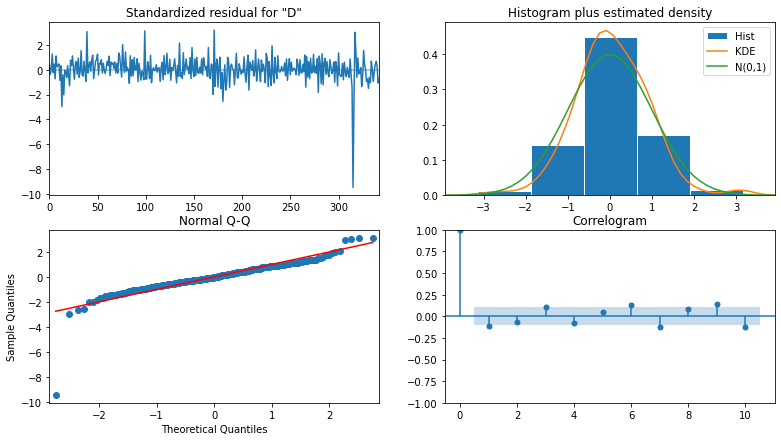

In [18]:
model.fit().plot_diagnostics(figsize=(13,7))
plt.show()

#### ***Testing for white noise serie***

c:\Users\myros\anaconda3\envs\Statistics\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


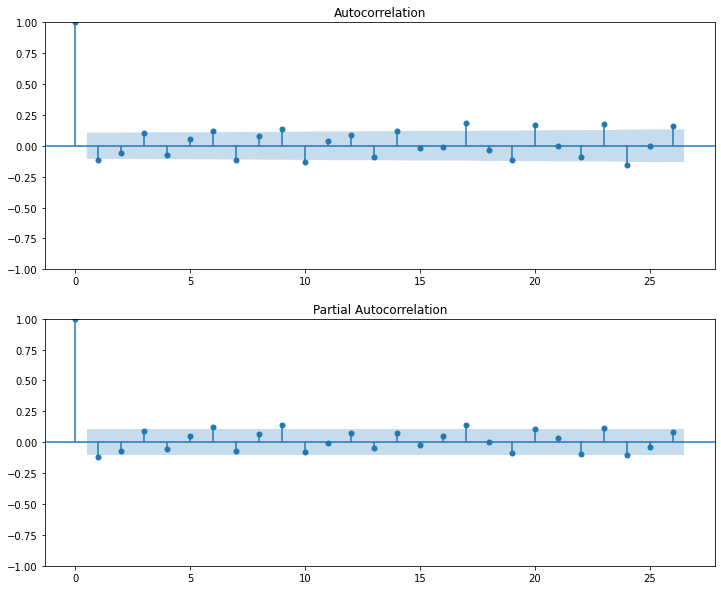

In [19]:
# Plotting the autocorrelations of the model residuals/error
residuals = sarima_model_result.resid
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residuals, ax=ax1)  
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residuals, ax=ax2)

(array([  1.,   0.,   0.,   0.,   1.,   4.,  64., 194.,  73.,   6.]),
 array([-0.21320815, -0.18467781, -0.15614748, -0.12761714, -0.0990868 ,
        -0.07055647, -0.04202613, -0.0134958 ,  0.01503454,  0.04356488,
         0.07209521]),
 <BarContainer object of 10 artists>)

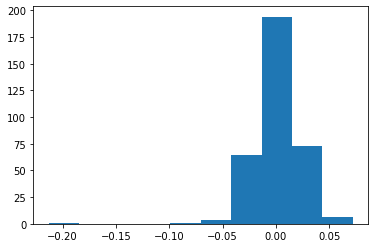

In [20]:
# Plotting the histogram to confirm it has a Gaussian distribution
plt.hist(residuals)

As we can see in the two diagramas above this serie is a white noise serie since it has a Gaussian distribution and the autoccorellations of the residuals do not exceed the 95% confidence interval.

---
## **Prediction**

In [22]:
predictions = sarima_model_result.predict(start=h_index_economic_activity_mx_stationary_no_nan.shape[0], end=h_index_economic_activity_mx_stationary_no_nan.shape[0]+24, dynamic=False)
predictions = pd.DataFrame(predictions)
predictions.reset_index(inplace=True)
predictions = predictions.rename(columns = {'index':'Periodo'})
predictions

,Periodo,predicted_mean
0,2022-08-01,0.042053
1,2022-09-01,0.051398
2,2022-10-01,0.067627
3,2022-11-01,0.049112
4,2022-12-01,0.046632
5,2023-01-01,0.061653
6,2023-02-01,0.059807
7,2023-03-01,0.047708
8,2023-04-01,0.031736
9,2023-05-01,0.024726


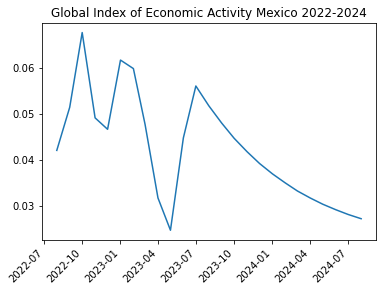

In [23]:
# Plotting the index over time
plt.clf()
plt.title("Global Index of Economic Activity Mexico 2022-2024")
plt.plot(predictions.Periodo, predictions.predicted_mean)
plt.xticks(rotation = 45, ha = "right")
plt.show()